In [4]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.9 MB/s eta 0:00:00


In [5]:
pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 105.2 MB/s eta 0:00:00


In [22]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

In [15]:
def build_qrng_circuit():
    qc = QuantumCircuit(1, 1)
    qc.h(0)               # Create superposition
    qc.measure(0, 0)      # Measure qubit
    return qc


In [35]:
def generate_random_bit():
    qc = build_qrng_circuit()
    backend = AerSimulator()
    result = backend.run(qc, shots=1).result()
    counts = result.get_counts()
    bit = list(counts.keys())[0]
    return bit

In [26]:
def generate_n_bits(n_bits=8):
    bits = ""
    for _ in range(n_bits):
        bits += generate_random_bit()
    return bits


In [27]:
def binary_to_decimal(binary_str):
    return int(binary_str, 2)


In [36]:
n = 16

random_bits = generate_n_bits(n)
decimal_value = binary_to_decimal(random_bits)

print("Quantum Random Bits:", random_bits)
print("Decimal Equivalent:", decimal_value)

Quantum Random Bits: 1010010110001000
Decimal Equivalent: 42376


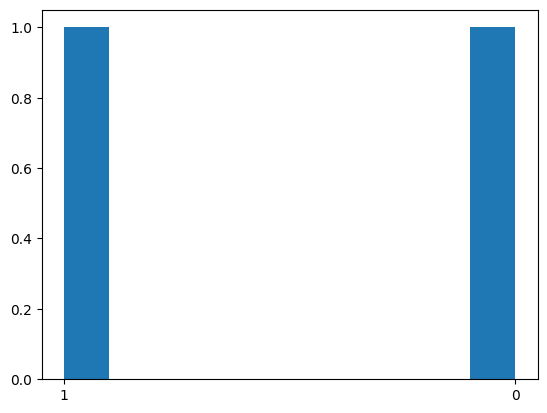

In [43]:
# Run 1000 times to show distribution
import matplotlib.pyplot as plt
qc = build_qrng_circuit()
backend = AerSimulator()
result = backend.run(qc, shots=1000).result()

plt.hist(result.get_counts())
plt.show()
